In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv("client_train.csv")
test = pd.read_csv("client_test.csv")
ss = pd.read_csv("SampleSubmission.csv")

In [3]:
train2 = pd.read_csv("invoice_train.csv")
test2 = pd.read_csv("invoice_test.csv")
ss2 = pd.read_csv("SampleSubmission.csv")

C:\Users\Mr Peter\AppData\Local\Temp\ipykernel_6852\3614081218.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  train2 = pd.read_csv("invoice_train.csv")


In [4]:
train.head()

,disrict,client_id,client_catg,region,creation_date,target
0,60,train_Client_0,11,101,31/12/1994,0.0
1,69,train_Client_1,11,107,29/05/2002,0.0
2,62,train_Client_10,11,301,13/03/1986,0.0
3,69,train_Client_100,11,105,11/07/1996,0.0
4,62,train_Client_1000,11,303,14/10/2014,0.0


In [5]:
test.head()

,disrict,client_id,client_catg,region,creation_date
0,62,test_Client_0,11,307,28/05/2002
1,69,test_Client_1,11,103,06/08/2009
2,62,test_Client_10,11,310,07/04/2004
3,60,test_Client_100,11,101,08/10/1992
4,62,test_Client_1000,11,301,21/07/1977


In [6]:
ss.head()

,client_id,target
0,test_Client_0,0.957281
1,test_Client_1,0.996425
2,test_Client_10,0.612359
3,test_Client_100,0.776933
4,test_Client_1000,0.571046


In [7]:
target = [col for col in train.columns if col not in test.columns]
target

['target']

In [8]:
train2.head()

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,train_Client_0,2014-03-24,11,1335667,0,203,8,1,82,0,0,0,14302,14384,4,ELEC
1,train_Client_0,2013-03-29,11,1335667,0,203,6,1,1200,184,0,0,12294,13678,4,ELEC
2,train_Client_0,2015-03-23,11,1335667,0,203,8,1,123,0,0,0,14624,14747,4,ELEC
3,train_Client_0,2015-07-13,11,1335667,0,207,8,1,102,0,0,0,14747,14849,4,ELEC
4,train_Client_0,2016-11-17,11,1335667,0,207,9,1,572,0,0,0,15066,15638,12,ELEC


In [9]:
test2.head()

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,test_Client_0,2018-03-16,11,651208,0,203,8,1,755,0,0,0,19145,19900,8,ELEC
1,test_Client_0,2014-03-21,11,651208,0,203,8,1,1067,0,0,0,13725,14792,8,ELEC
2,test_Client_0,2014-07-17,11,651208,0,203,8,1,0,0,0,0,14792,14792,4,ELEC
3,test_Client_0,2015-07-13,11,651208,0,203,9,1,410,0,0,0,16122,16532,4,ELEC
4,test_Client_0,2016-07-19,11,651208,0,203,9,1,412,0,0,0,17471,17883,4,ELEC


In [10]:
ss2.head()

,client_id,target
0,test_Client_0,0.957281
1,test_Client_1,0.996425
2,test_Client_10,0.612359
3,test_Client_100,0.776933
4,test_Client_1000,0.571046


In [11]:
target = [col for col in train2.columns if col not in test2.columns]
target

[]

In [12]:
target = [col for col in train.columns if col not in test.columns]
target

['target']

In [13]:
train.describe()

,disrict,client_catg,region,target
count,135493.000000,135493.000000,135493.000000,135493.000000
mean,63.511222,11.512506,206.159809,0.055841
std,3.354400,4.423761,104.207044,0.229614
min,60.000000,11.000000,101.000000,0.000000
25%,62.000000,11.000000,103.000000,0.000000
50%,62.000000,11.000000,107.000000,0.000000
75%,69.000000,11.000000,307.000000,0.000000
max,69.000000,51.000000,399.000000,1.000000


In [14]:
train2.describe()

,tarif_type,counter_number,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number
count,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06
mean,2.012804e+01,1.230587e+11,1.724884e+02,7.321702e+00,1.003040e+00,4.109795e+02,1.093225e+02,2.030620e+01,5.292588e+01,1.776700e+04,1.834970e+04,4.483095e+01
std,1.347256e+01,1.657267e+12,1.338871e+02,1.571654e+00,3.083466e-01,7.573080e+02,1.220123e+03,1.574239e+02,8.754725e+02,4.036693e+04,4.095321e+04,3.128335e+03
min,8.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.100000e+01,1.211080e+05,5.000000e+00,6.000000e+00,1.000000e+00,7.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.791000e+03,2.056000e+03,4.000000e+00
50%,1.100000e+01,4.945610e+05,2.030000e+02,8.000000e+00,1.000000e+00,2.740000e+02,0.000000e+00,0.000000e+00,0.000000e+00,7.690000e+03,8.192000e+03,4.000000e+00
75%,4.000000e+01,1.115161e+06,2.070000e+02,9.000000e+00,1.000000e+00,6.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00,2.166000e+04,2.234300e+04,4.000000e+00
max,4.500000e+01,2.798115e+13,6.000000e+02,4.130000e+02,5.000000e+01,9.999100e+05,9.990730e+05,6.449200e+04,5.479460e+05,2.800280e+06,2.870972e+06,6.366240e+05


In [15]:
test.describe()

,disrict,client_catg,region
count,58069.000000,58069.000000,58069.000000
mean,63.510617,11.507224,206.018461
std,3.356708,4.395923,104.144028
min,60.000000,11.000000,101.000000
25%,62.000000,11.000000,103.000000
50%,62.000000,11.000000,107.000000
75%,69.000000,11.000000,307.000000
max,69.000000,51.000000,399.000000


In [16]:
test2.describe

<bound method NDFrame.describe of                 client_id invoice_date  tarif_type  counter_number  \
0           test_Client_0   2018-03-16          11          651208   
1           test_Client_0   2014-03-21          11          651208   
2           test_Client_0   2014-07-17          11          651208   
3           test_Client_0   2015-07-13          11          651208   
4           test_Client_0   2016-07-19          11          651208   
...                   ...          ...         ...             ...   
1939725  test_Client_9999   2010-03-11          11          869269   
1939726  test_Client_9999   2011-03-15          11          869269   
1939727  test_Client_9999   2012-12-03          11          869269   
1939728  test_Client_9999   2009-07-01          11          869269   
1939729  test_Client_9999   2017-03-11          11          869269   

         counter_statue  counter_code  reading_remarque  counter_coefficient  \
0                     0           203        

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135493 entries, 0 to 135492
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   disrict        135493 non-null  int64  
 1   client_id      135493 non-null  object 
 2   client_catg    135493 non-null  int64  
 3   region         135493 non-null  int64  
 4   creation_date  135493 non-null  object 
 5   target         135493 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 6.2+ MB


In [18]:
train2.info

<bound method DataFrame.info of                   client_id invoice_date  tarif_type  counter_number  \
0            train_Client_0   2014-03-24          11         1335667   
1            train_Client_0   2013-03-29          11         1335667   
2            train_Client_0   2015-03-23          11         1335667   
3            train_Client_0   2015-07-13          11         1335667   
4            train_Client_0   2016-11-17          11         1335667   
...                     ...          ...         ...             ...   
4476744  train_Client_99998   2005-08-19          10         1253571   
4476745  train_Client_99998   2005-12-19          10         1253571   
4476746  train_Client_99999   1996-09-25          11          560948   
4476747  train_Client_99999   1996-05-28          11          560948   
4476748  train_Client_99999   1996-01-25          11          560948   

        counter_statue  counter_code  reading_remarque  counter_coefficient  \
0                    0  

In [19]:
target = [col for col in train.columns if col not in test.columns]
target

['target']

In [20]:
target = [col for col in train2.columns if col not in test2.columns]
target

[]

In [21]:
train.shape

(135493, 6)

In [22]:
test.shape

(58069, 5)

In [23]:
train2.shape

(4476749, 16)

In [24]:
test2.shape

(1939730, 16)

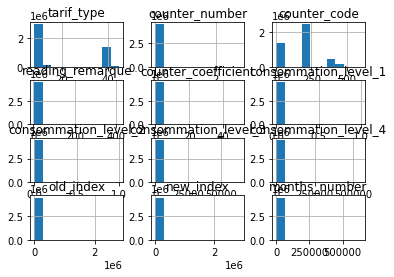

In [25]:
seaborn = train2.hist()

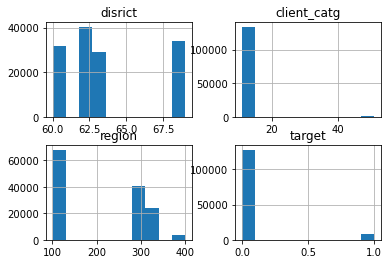

In [26]:
seaborn = train.hist()

In [ ]:
test2.sum()

In [ ]:
test.isnull()

In [ ]:
train.[num_feat].head()

In [ ]:
train2.[num_feat].head()

In [ ]:
test.[num_feat].head()

In [ ]:
test1.[num_feat].head()

In [ ]:
train.age.hist()

In [ ]:
train.Age.hist()